# Data Science on Imdb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
df = pd.read_csv('../data/IMDB.csv', encoding='utf-8')
df.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [3]:
df.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,99.000000,9.100000e+01,99.000000,9.500000e+01,99.000000,99.000000
mean,155.494949,1.541914e+08,1976.444444,1.048570e+08,6.892929,66045.707071
std,72.797927,1.399503e+08,255.880601,7.703169e+07,1.925514,58108.860365
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.500000,4.720632e+07,2012.000000,4.000000e+07,6.550000,25000.000000
50%,143.000000,1.156040e+08,2013.000000,8.000000e+07,7.200000,54000.000000
75%,155.000000,2.374894e+08,2014.000000,1.740000e+08,7.850000,85500.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000


## Data Cleaning

### Exploring Data

In [4]:
import qgrid
qgrid_view = qgrid.show_grid(df, show_toolbar=True)
qgrid_view

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Drop useless columns

In [5]:
df.drop(['color','language'], axis=1, inplace=True)
df.head()

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


### Handle text attributes

In [6]:
df['director_name'].fillna('', inplace=True)

### Handle numeric attributes

In [7]:
df['gross'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)

### Unify countries names

In [8]:
df['country']=df['country'].str.upper()
df['country'] = np.where(df['country']=='UNITED STATES','USA', df['country'])
df.head(20)

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,USA,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
5,,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
6,Peter Jackson,-50,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,USA,180000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",166000
7,Edward Hall,180,0.0,Drama|Romance,Restless,2012,UK,0.0,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
8,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


### Fixing bad data entry

In [9]:
df['director_name'] = np.where(df['director_name']=='N/A','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='Nan','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='Null','', df['director_name'])

### Handling outliers

In [10]:
df["gross"]=df["gross"].astype(float)
df["duration"]=df["duration"].astype(float)
df["budget"]=df["budget"].astype(float)

df['duration'] = np.where(df['duration']<=10,0, df['duration'])
df['duration'] = np.where(df['duration']>300,0, df['duration'])
df['imdb_score'] = np.where(df['imdb_score']<=0,0, df['imdb_score'])
df['title_year'] = np.where(df['title_year']<2010,0, df['title_year'])

## Splitting data

In [11]:
actor_list = df["actors"].str.split(",", n = 2, expand = True) # n : max index
df["actor1"]= actor_list[0] 
df["actor2"]= actor_list[1] 
df["actor3"]= actor_list[2] 
df.drop(columns=['actors'], inplace=True)

## Creating new metric : Gross over Budget

In [12]:
df['GOB'] = df.apply(lambda row: row['gross']/row['budget'] if row['budget']!=0 else 0, axis=1)

In [13]:
top_GOB=df.sort_values('GOB',ascending=False).head(10)
print(top_GOB)

        director_name  duration        gross  \
43        Tate Taylor     146.0  169705587.0   
15  Richard Linklater     165.0   25359200.0   
14       F. Gary Gray     167.0  161029270.0   
59                        142.0  407999255.0   
75                        138.0  150117807.0   
44   Francis Lawrence     146.0  424645577.0   
76    Robert Zemeckis     138.0   93749203.0   
94      Steve McQueen     134.0   56667870.0   
8         Joss Whedon     173.0  623279547.0   
9         Joss Whedon     173.0  623279547.0   

                                 genres                      movie_title  \
43                                Drama                         The Help   
15                                Drama                          Boyhood   
14  Biography|Crime|Drama|History|Music           Straight Outta Compton   
59      Adventure|Drama|Sci-Fi|Thriller                 The Hunger Games   
75                          Crime|Drama                  American Hustle   
44            A

## Save data:

In [14]:
df.to_csv(r'../data/new_IMDB.csv', index=None)

## Data Analysis

In [15]:
df_imdb = pd.read_csv('../data/new_IMDB.csv')
df_imdb.head()

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,movie_facebook_likes,actor1,actor2,actor3,GOB
0,Martin Scorsese,240.0,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,138000,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,1.168667
1,Shane Black,195.0,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,95000,Robert Downey Jr.,Jon Favreau,Don Cheadle,2.044961
2,Quentin Tarantino,187.0,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,114000,Craig Stark,Jennifer Jason Leigh,Zoë Bell,1.229913
3,Kenneth Lonergan,186.0,46495.0,Drama,Margaret,2011,USA,14000000.0,6.5,0,Matt Damon,Kieran Culkin,John Gallagher Jr.,0.003321
4,Peter Jackson,186.0,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,83000,Aidan Turner,Adam Brown,James Nesbitt,1.148246
5,NaN,183.0,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,0,USA,250000000.0,6.9,197000,Henry Cavill,Lauren Cohan,Alan D. Purwin,1.320996
6,Peter Jackson,0.0,303001229.0,Adventure|Fantasy,The Hobbit: An Unexpected Journey,2012,USA,180000000.0,7.9,166000,Aidan Turner,Adam Brown,James Nesbitt,1.683340
7,Edward Hall,180.0,0.0,Drama|Romance,Restless,2012,UK,0.0,7.2,434,Rufus Sewell,Hayley Atwell,Charlotte Rampling,0.000000
8,Joss Whedon,173.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,USA,220000000.0,8.1,123000,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,2.833089
9,Joss Whedon,173.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,USA,220000000.0,8.1,123000,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,2.833089


### Exploring data

In [16]:
qgrid = qgrid.show_grid(df_imdb, show_toolbar=True)
qgrid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Directors of the top GOB movies:

In [17]:
top_GOB = df_imdb.sort_values('GOB',ascending=False).head(15)

In [18]:
top_GOB['director_familyName'] = df_imdb["director_name"].str.split(" ", n = 2, expand = True) [1]

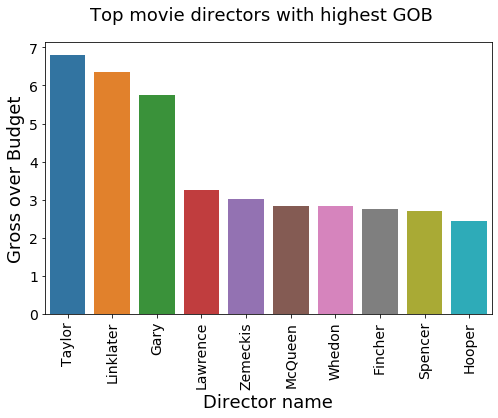

In [19]:
fig,ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x="director_familyName", y="GOB", data=top_GOB)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Top movie directors with highest GOB', fontsize=18)
ax.set_xlabel('Director name',fontsize=18)
ax.set_ylabel('Gross over Budget',fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

## Clustering Movies

In [20]:
df_c=df_imdb.loc[(df_imdb['GOB']>0) & df_imdb['imdb_score']>0][['imdb_score','GOB']]
df_c.head()

,imdb_score,GOB
0,8.2,1.168667
1,7.2,2.044961
2,7.9,1.229913
3,6.5,0.003321
4,7.9,1.148246


In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Elbow Method

Text(0.5, 1.0, 'Selecting the best K')

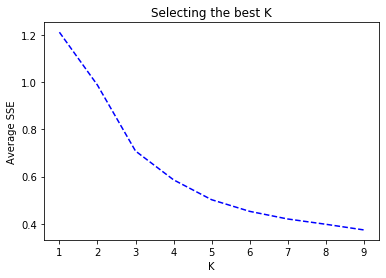

In [22]:
K = range(1, 10)
meandist = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_c)
    meandist.append(sum(np.min(cdist(df_c, km.cluster_centers_,'euclidean'), axis=1)) / df_c.shape[0])
plt.plot(K, meandist, '--', color='blue')
plt.xlabel('K')
plt.ylabel('Average SSE')
plt.title('Selecting the best K')

### Centroids

In [23]:
km_ = KMeans(n_clusters=3)
km_.fit(df_c)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
centroids=km_.cluster_centers_
labels = km_.labels_

In [35]:
print(centroids)
print(labels)

[[7.77111111 1.79254747]
 [7.825      6.02745713]
 [6.40789474 0.83505584]]
[0 0 0 2 0 2 0 0 0 0 2 0 1 1 0 2 0 0 0 0 0 2 0 2 0 2 0 2 2 0 2 0 0 0 2 2 0
 2 1 0 0 0 2 2 2 2 0 0 0 0 0 0 2 1 0 2 2 0 2 0 0 0 2 2 2 2 0 0 2 0 2 2 2 2
 2 2 0 2 0 2 2 2 2 0 0 0 2]


### Plotting Centroids

Text(0.5, 0, 'IMDB Score')

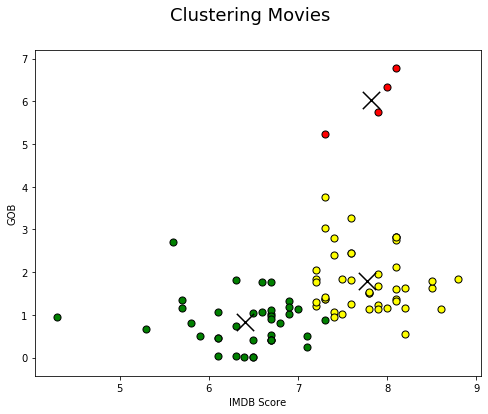

In [25]:
fig = plt.figure(figsize=(8,6))
colors = ["yellow","red","green"]
df_array = np.array(df_c)

for i in range(len(df_array)):
    plt.scatter(df_array[i][0],df_array[i][1],c=colors[labels[i]],s=50,marker='o',edgecolors='black')

plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='black',s=300)
fig.suptitle('Clustering Movies', fontsize=18)
plt.ylabel('GOB')
plt.xlabel('IMDB Score')

## Relationship between IMDB Score and Facebook likes of movies

In [26]:
# re scaling the data
df_imdb['movie_facebook_likes']=df_imdb['movie_facebook_likes'].apply(lambda row: row/10000)

### Regression with Seaborn

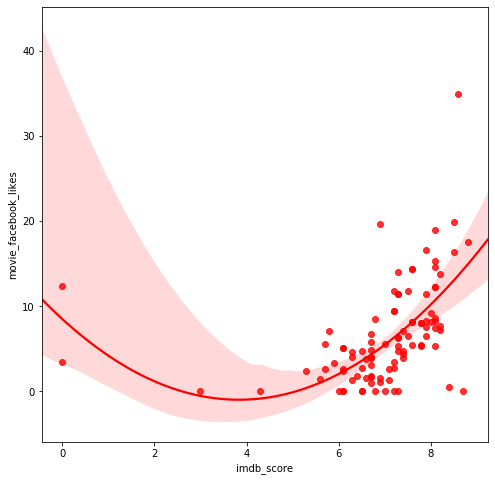

In [27]:
fig = plt.figure(figsize=(8,8))
sns.regplot('imdb_score', 'movie_facebook_likes', df_imdb, fit_reg=True,order=2,color='red')

### Linear Regression with prediction for an IMDB score

In [28]:
X = df_imdb['imdb_score'].values[:,np.newaxis]
y = df_imdb['movie_facebook_likes'].values

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediction:

In [32]:
IMDB_score=8.8
X_test=np.array([IMDB_score]).reshape(1,-1)
X_test

array([[8.8]])

In [33]:
y_pred = lr.predict(X_test)
print(f"Facebook likes estimation (10k) for a IMDB score:{IMDB_score}-->{y_pred}")

Facebook likes estimation (10k) for a IMDB score:8.8-->[9.34539641]


#### Plotting the model and prediction

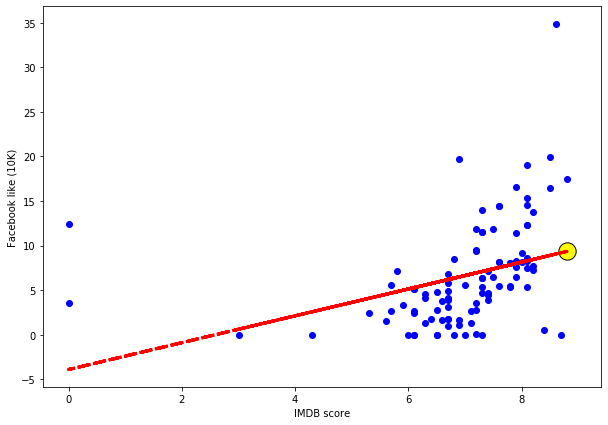

In [34]:
fig,ax = plt.subplots(figsize=(10, 7))

plt.xlabel('IMDB score');
plt.ylabel('Facebook like (10K)');

plt.scatter(X, y,color='blue')
plt.plot(X, lr.predict(X), color='red', linestyle='--', lw=3)

plt.scatter(X_test, y_pred, color='yellow', s=300, edgecolors='black') 